## ResNet Albatoin Study

DONE:
- depth
- network architecture

TODO:
- learning strategy
- stochastic depth
- vinilla deep network

In [2]:
#%pylab inline
matplotlib.style.use("fivethirtyeight")
#print(matplotlib.style.available)

from pygments import lexers, formatters, highlight
import lab_workbook
import pandas as pd
import collections
import os
reload(lab_workbook)

<module 'lab_workbook' from '/usr/local/lib/python2.7/dist-packages/lab_workbook/__init__.pyc'>

### Important: Check Active Experiments
Remember to edit the file `~/.lab-workbook-config` to choose a proper folder.
bucketPrefix = s3://resnet2020/resNet_new/

In [7]:
wb = lab_workbook.ExperimentRepository()

# find active experiments and list them here
for i in range(size(wb[:])-1):
    tag = str(os.path.basename(os.path.dirname(wb[i+1].prefix)))
    curr_expe = wb[tag]
    
    artifact = curr_expe.list_artifacts()  # list type
    
    # decide whether or not it's active
    if ('Training loss.csv' in artifact) and ('Testing Error.csv' in artifact):
    #if ('draw.json' in artifact):
        
        # active experiment, show its opts
        print '\nactive tag: %s' % tag
        opt = curr_expe['opt.json']   # dict type
        print 'note: %s' % opt['note']


active tag: 201604051455-5axGzTKG0P
note: N_3

active tag: 201604051459-0lkTlmWIi2
note: N_3_no_iter_size

active tag: 201604051518-KrKtiSnTJt
note: N_5_no_iter_size

active tag: 201604051519-kFIuH003Ig
note: N_9_no_iter_size

active tag: 201604051520-naxc9GH54I
note: N_18_iter_size_2

active tag: 201604060900-WupkUbhnnp
note: N_30_size_b64_i2_ls139

active tag: 201604061025-kS3KjU59Dq
note: N_18_size_b64_i2_ls149_no_bn_and_relu

active tag: 201604101526-h4fkMTgFmd
note: N_3_size_b64_i2_local

active tag: 201604101533-TBMvcUq4AY
note: N_3_size_b64_i2_local

active tag: 201604101539-j7qZFdk4vC
note: N_3_size_b64_i2_local


### Draw curves

write something                   0.0807
fuck                              0.0865
bs = 128, depth = 32              0.0713
bs = 128, depth = 56              0.0763
bs = 64 x 2 = 128, depth = 110    0.0719
bs = 64 x 2 = 128, depth = 182    0.0740
Name: 200.0, dtype: float64


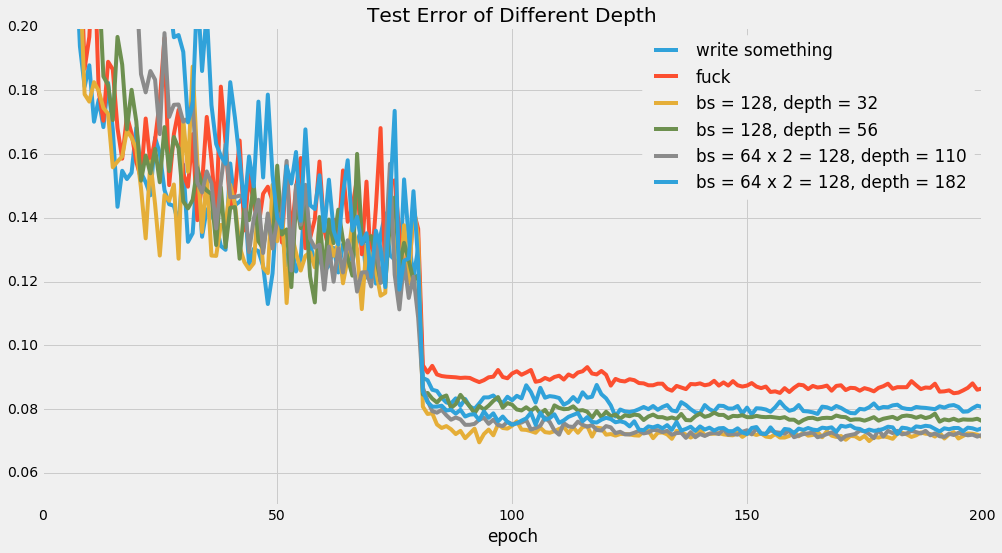

In [12]:
# configure the following manually based on the output above
experiments = collections.OrderedDict([
        ("201604051455-5axGzTKG0P", "write something"),
        ("201604051459-0lkTlmWIi2", "fuck"),
        ("201604051518-KrKtiSnTJt", "bs = 128, depth = 32"),
        ("201604051519-kFIuH003Ig", "bs = 128, depth = 56"),
        ("201604051520-naxc9GH54I", "bs = 64 x 2 = 128, depth = 110"),
        ('201604060900-WupkUbhnnp', 'bs = 64 x 2 = 128, depth = 182'),       
    ])
        #('201604061025-kS3KjU59Dq', 'bs = 64 x 2 = 128, depth = 110, no bnAndRelu'),
    
error = wb.meld_csv(experiments, "Testing Error.csv", "error")
#print(type(error)) # <class 'pandas.core.frame.DataFrame'>
error.index = error.index / 50000.0
error.index.name = 'epoch'

error.plot(xlim=(0, 200), ylim=(0.05, 0.2), figsize=(15, 8), title="Test Error of Different Depth")
#figsize=(15, 8),
print error.loc[200.0]

# save the results (optional)
#error.to_csv("error_sort_depth.csv")